# **Movie Recommendation System and user ratings prediction ( Machine Learning )**

**About Dataset:**

● movies_data.csv - The data contains -
Id - which is movie id
Genres - it can contain multiple genres for a single movie.
Overview - A textual description about the movie

● ratings.csv -
Userid - id for user
Movieid - id for movie
Rating - given by user to that movie (out of 5)

**Task**:

To recommend optimal movies to user and predict user ratings 

**Approach:**

Demographic, Content-Based and collaborative filtering using SVD.



# **Movie Recommendation Engine**

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd

# **Loading Data**

In [ ]:
movies=pd.read_csv('/content/drive/My Drive/glyka/movies_data.csv')
ratings=pd.read_csv('/content/drive/My Drive/glyka/ratings.csv')

In [ ]:
movies.head()

,genres,id,overview,title
0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",58372,"On Christmas eve, a relentlessly cheerful woma...",Reckless
1,"[{'id': 10749, 'name': 'Romance'}, {'id': 12, ...",278939,A runaway teenage girl and a drifter rob a ban...,Girl in the Cadillac
2,"[{'id': 99, 'name': 'Documentary'}]",73183,The strange life and the wonderfully awful fil...,"The Haunted World of Edward D. Wood, Jr."
3,"[{'id': 99, 'name': 'Documentary'}]",255546,A biography of the Portuguese-Brazilian singer...,Carmen Miranda: Bananas Is My Business
4,"[{'id': 18, 'name': 'Drama'}]",64562,Truman Capote's semi-autobiographical first no...,Other Voices Other Rooms


# **Exploratory Data analysis and Feature engineering**

**Repalcing column name "id" with "movieId" to merge with ratings.**

In [ ]:
movies['movieId']=movies['id']
movies = movies.drop("id", axis=1)

In [ ]:
movies.tail()

,genres,overview,title,movieId
45461,"[{'name': 'Carousel Productions', 'id': 11176}...",Released,NaN,20-08-1997
45462,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",Third film of the Mardock Scramble series.,NaN,122662
45463,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",Released,NaN,29-09-2012
45464,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",A group of skiers are terrorized during spring...,NaN,249260
45465,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",Released,NaN,01-01-2014


***Here, few movieIds have unsuitable format. So we'll remove the rows with overview='Released'. Also id has been replaced with movieId. ***

In [ ]:
temp = movies[movies['overview'] == 'Released'].index
# Removing these row indexes from dataFrame
movies.drop(temp, inplace=True)

In [ ]:
ratings.head()

,userId,movieId,rating
0,2,17,5.0
1,2,39,5.0
2,2,150,5.0
3,2,222,5.0
4,2,265,5.0


In [ ]:
movies.shape

(45463, 4)

In [ ]:
ratings.shape

(100004, 3)

In [ ]:
movies.isnull().sum()

genres        0
overview    954
title         3
movieId       0
dtype: int64

In [ ]:
ratings.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

# **Merging Data for Demographic Filtering**

In [ ]:
movies['movieId']=movies['movieId'].astype(int)
ratings['movieId']=ratings['movieId'].astype(int)
df=movies.merge(ratings,on='movieId')
df.head()

,genres,overview,title,movieId,userId,rating
0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 12,...",Two adventurers set sail to find a giant man-e...,Shark Kill,97593,262,3.5
1,"[{'id': 99, 'name': 'Documentary'}]",NaN,Modern Life,8930,481,4.5
2,"[{'id': 99, 'name': 'Documentary'}]",NaN,Modern Life,8930,15,2.5
3,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",Somewhere in Europe by a great sea stands a sm...,Lotte from Gadgetville,1260,19,5.0
4,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",Somewhere in Europe by a great sea stands a sm...,Lotte from Gadgetville,1260,102,5.0


In [ ]:
df=df.drop("userId",axis=1)

In [ ]:
#grouping data by title and count of ratings
ratings_count=df.groupby(['title'], as_index = False)[['rating']].count()
ratings_count['ratings_count']=ratings_count['rating']
ratings_count=ratings_count.drop("rating", axis=1)
ratings_count.head()

,title,ratings_count
0,!Women Art Revolution,2
1,'Gator Bait,1
2,'Twas the Night Before Christmas,2
3,...And God Created Woman,1
4,00 Schneider - Jagd auf Nihil Baxter,2


In [ ]:
ratings_count.describe()


,ratings_count
count,2794.000000
mean,16.103794
std,31.481306
min,1.000000
25%,1.000000
50%,4.000000
75%,15.750000
max,324.000000


Here, the minimun number of ratings count is 1 and max is 324.

**Merging df and ratings_count**

In [ ]:
final_df=pd.merge(df,ratings_count,on='title')
final_df.head()

,genres,overview,title,movieId,rating,ratings_count
0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 12,...",Two adventurers set sail to find a giant man-e...,Shark Kill,97593,3.5,1
1,"[{'id': 99, 'name': 'Documentary'}]",NaN,Modern Life,8930,4.5,2
2,"[{'id': 99, 'name': 'Documentary'}]",NaN,Modern Life,8930,2.5,2
3,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",Somewhere in Europe by a great sea stands a sm...,Lotte from Gadgetville,1260,5.0,21
4,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",Somewhere in Europe by a great sea stands a sm...,Lotte from Gadgetville,1260,5.0,21


# **Recommendation based on Demographic Filtering**

**Final Data frame**

In [ ]:
final_df_=final_df.groupby(['movieId','title','genres','overview','ratings_count'], as_index = False)[['rating']].mean()
final_df_['ratings_mean']=final_df_['rating']
final_df_=final_df_.drop("rating",axis=1)
final_df_.head()

,movieId,title,genres,overview,ratings_count,ratings_mean
0,2,Ariel,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",Taisto Kasurinen is a Finnish coal miner whose...,107,3.401869
1,3,Shadows in Paradise,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...","An episode in the life of Nikander, a garbage ...",59,3.161017
2,5,Four Rooms,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",It's Ted the Bellhop's first night on the job....,56,3.267857
3,6,Judgment Night,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...","While racing to a boxing match, Frank, Mike, J...",104,3.884615
4,11,Star Wars,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",Princess Leia is captured and held hostage by ...,82,3.689024


In [ ]:
final_df_.shape

(2809, 6)

**Mean of all the ratings**

In [ ]:
c=final_df_['ratings_mean'].mean()
c

3.332387587363881

So, the mean rating for all the movies is approx 3 on a scale of 5.The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 80th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 85% of the movies in the list.

**Quantile**

In [ ]:
m=final_df_['ratings_count'].quantile(0.85)
m

30.0

In [ ]:
final_df_.shape

(2809, 6)

Now, we can filter out the movies that qualify for the chart

In [ ]:
q_movies=final_df_.copy().loc[final_df_['ratings_count'] >= m]
q_movies.shape

(427, 6)

We see that there are 427 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, weighted_rating() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [ ]:
def weighted_rating(x, m=m, c=c):
    v = x['ratings_count']
    R = x['ratings_mean']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * c)

In [ ]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [ ]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'ratings_count', 'ratings_mean', 'score']].head(10)

,title,ratings_count,ratings_mean,score
747,Blood: The Last Vampire,118,5.000000,4.661970
228,The Million Dollar Hotel,311,4.487138,4.385547
543,Sleepless in Seattle,200,4.487500,4.336833
577,The Thomas Crown Affair,179,4.387097,4.235703
352,Once Were Warriors,244,4.303279,4.196977
212,Terminator 3: Rise of the Machines,324,4.256173,4.177886
407,Men in Black II,224,4.256696,4.147526
184,The 39 Steps,291,4.221649,4.138541
576,The Thomas Crown Affair,179,4.235043,4.105475
586,Dawn of the Dead,208,4.200000,4.090637


# **Data Visualisation**

**Score Distribution**

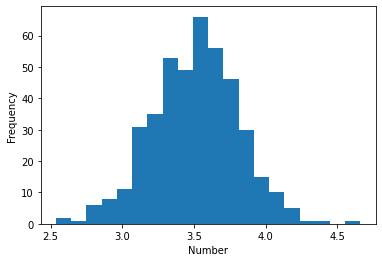

In [ ]:
import matplotlib.pyplot as plt
plt.hist(q_movies['score'], bins = 20)
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

**Most_rated movies based on ratings count**

In [ ]:
Most_rated=ratings_count.nlargest(20,'ratings_count')

<BarContainer object of 20 artists>

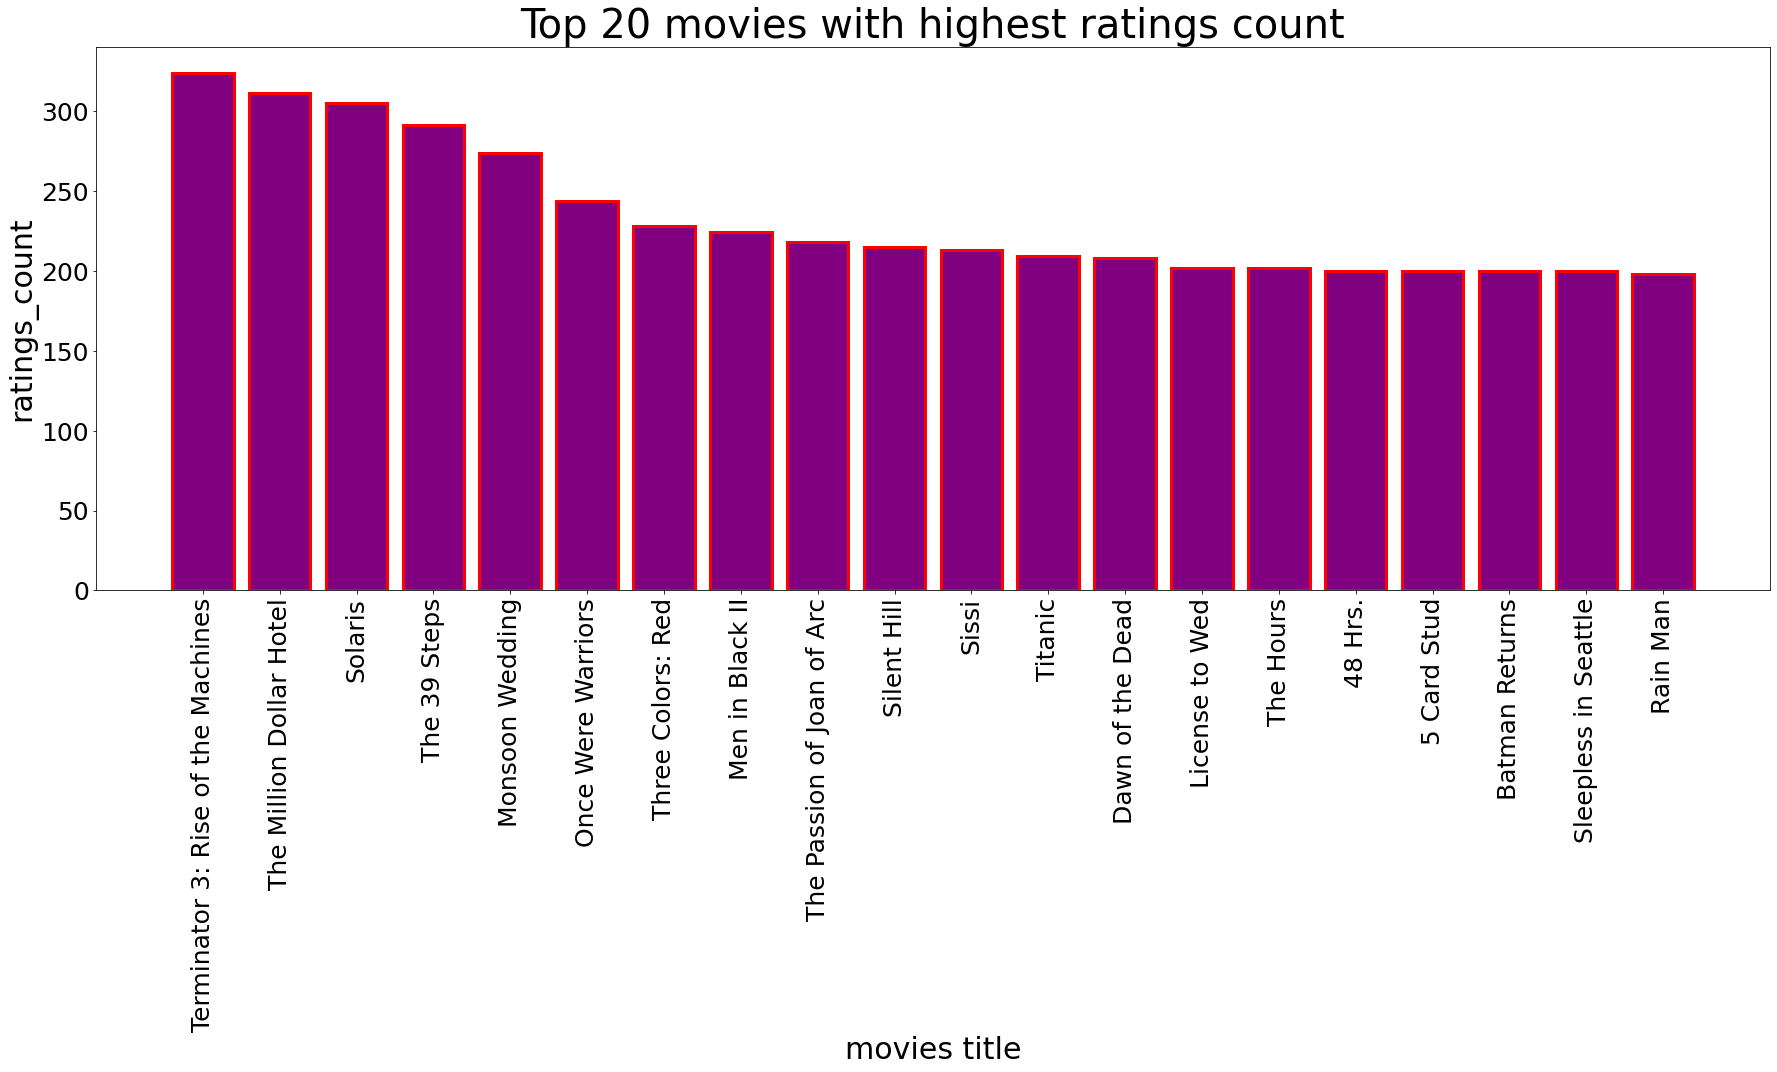

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest ratings count',fontsize=40)
plt.ylabel('ratings_count',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(Most_rated['title'],Most_rated['ratings_count'],linewidth=3,edgecolor='red',color='purple')

**Higest rated movies based on ratings sum**

In [ ]:
ratings_sum=df.groupby(['title'])[['rating']].sum()
ratings_sum=ratings_sum.nlargest(20,'rating')

<BarContainer object of 20 artists>

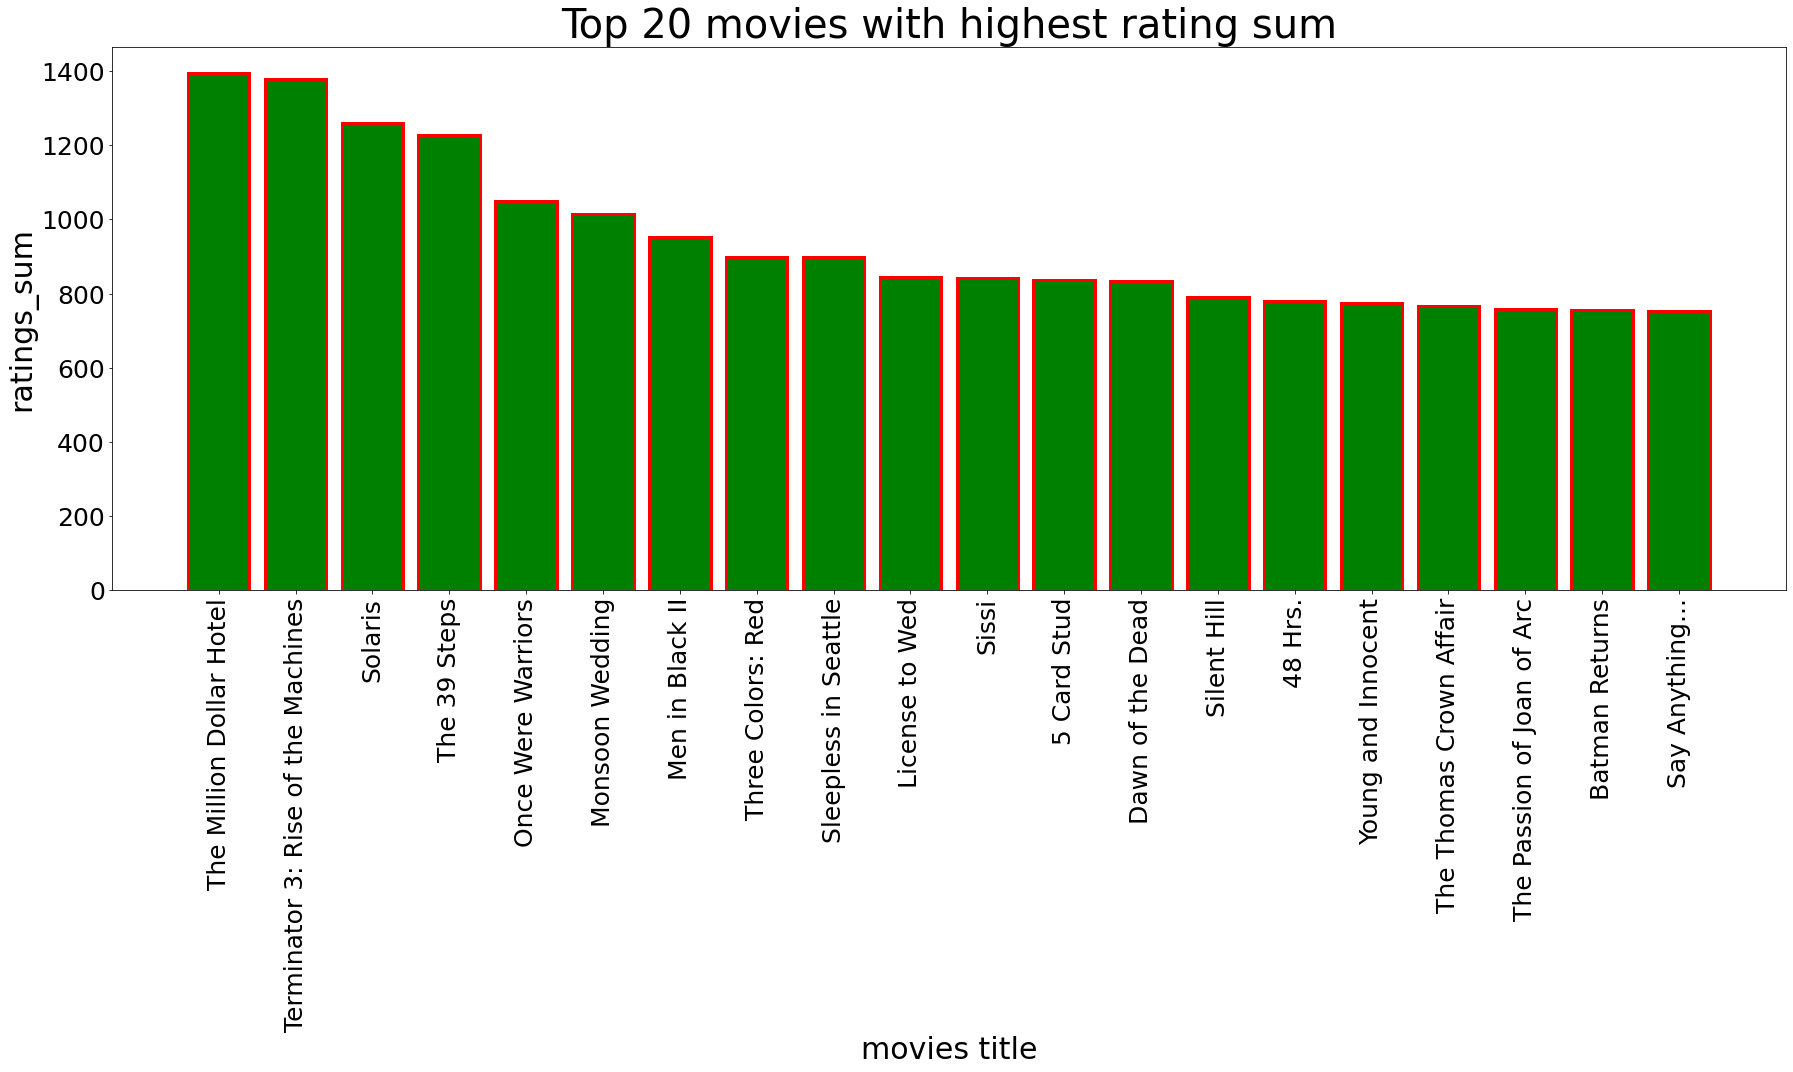

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating sum',fontsize=40)
plt.ylabel('ratings_sum',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(ratings_sum.index,ratings_sum['rating'],linewidth=3,edgecolor='red',color='green')

# **Content Based Filtering**

In this recommender system the content of the movie (genres) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

# **overviews-based Recommender**

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the overview feature of our dataset. Let's take a look at the data.

In [ ]:
final_df_['overview'].head(5)

0    Taisto Kasurinen is a Finnish coal miner whose...
1    An episode in the life of Nikander, a garbage ...
2    It's Ted the Bellhop's first night on the job....
3    While racing to a boxing match, Frank, Mike, J...
4    Princess Leia is captured and held hostage by ...
Name: overview, dtype: object

converting the word vector of each overview.Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
final_df_['overview'] = final_df_['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(final_df_['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(2809, 17156)

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies.

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(final_df_.index, index=final_df_['title']).drop_duplicates()

We are now in a good position to define our recommendation function. These are the following steps we'll follow :-

Get the index of the movie given its title.

Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.

Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.

Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
Return the titles corresponding to the indices of the top elements

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return final_df_['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Shadows in Paradise')

908     Fantomas vs. Scotland Yard
65              Three Colors: Blue
557          The Docks of New York
1161                         Kafka
1797                        Waiter
2447           Dominick and Eugene
2047                       Cloud 9
2590                    Dead Times
600                  Lethal Weapon
1807    In the Realm of the Senses
Name: title, dtype: object

In [ ]:
get_recommendations('Star Wars')

917                          The Empire Strikes Back
918                               Return of the Jedi
1999                                   Shanghai Noon
2393                                 The Magic Flute
1212                              The Princess Bride
2557                                   Mirror Mirror
920     Star Wars: Episode III - Revenge of the Sith
2149             Arthur and the Revenge of Maltazard
1147                                       Day Watch
43                Nausicaä of the Valley of the Wind
Name: title, dtype: object

In [ ]:
get_recommendations('Four Rooms')

2169                    California Suite
2439                                Boat
830     Bill & Ted's Excellent Adventure
136                         Hotel Rwanda
228             The Million Dollar Hotel
1343                                1408
1836                Murder in Three Acts
2678                       The Comedians
1823                      The Last Laugh
1923                   Maid in Manhattan
Name: title, dtype: object

While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great

# **Genres based-recommender**

It goes without saying that the quality of our recommender would be increased with the usage of better metadata. 

In [ ]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval
final_df_['genres'] = final_df_['genres'].apply(literal_eval)

Next, we'll write functions that will help us to extract the required information from genres.

In [ ]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [ ]:
final_df_['genres'] = final_df_['genres'].apply(get_list)

In [ ]:
final_df_[['genres']].head(10)

,genres
0,"[Drama, Crime]"
1,"[Drama, Comedy]"
2,"[Crime, Comedy]"
3,"[Action, Thriller, Crime]"
4,"[Adventure, Action, Science Fiction]"
5,"[Animation, Family]"
6,"[Comedy, Drama, Romance]"
7,[Drama]
8,"[Mystery, Drama]"
9,"[Drama, Crime, Music]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. 

In [ ]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
final_df['genres']=final_df['genres'].apply(clean_data)

We are now in a position to create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer (genres).

In [ ]:
def create_soup(x):
  return ''.join(x['genres'])

final_df_['soup']=final_df_.apply(create_soup, axis=1)


In [ ]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(final_df_['soup'])



In [ ]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# Reset index of our main DataFrame and construct reverse mapping as before
final_df_ = final_df_.reset_index()
indices = pd.Series(final_df_.index, index=final_df_['title'])

In [ ]:
get_recommendations('Shadows in Paradise', cosine_sim2)

197           The Edukators
297            Human Nature
301              The Idiots
555          Antonia's Line
737      Breakfast on Pluto
755     Mongolian Ping Pong
804     The Miracle of Bern
818    Fried Green Tomatoes
836            Small Change
837               Gigantics
Name: title, dtype: object

In [ ]:
get_recommendations('Star Wars', cosine_sim2)

236                   The Lost World: Jurassic Park
917                         The Empire Strikes Back
918                              Return of the Jedi
919    Star Wars: Episode II - Attack of the Clones
12                                       Metropolis
21                                    Magnetic Rose
32                                           Brazil
37                                War of the Worlds
53                                       Armageddon
63                               Back to the Future
Name: title, dtype: object

In [ ]:
get_recommendations('Four Rooms', cosine_sim2)

1184           Saving Grace
0                     Ariel
1       Shadows in Paradise
3            Judgment Night
4                 Star Wars
5              Finding Nemo
6              Forrest Gump
7           American Beauty
8              Citizen Kane
9        Dancer in the Dark
Name: title, dtype: object

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations.

# **Collaborative Filtering**

content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres

The engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

**Single Value Decomposition**

One way to handle the scalability and sparsity issue created by CF is to leverage a latent factor model to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). The lower the RMSE, the better the performance.

latent factor is a broad idea which describes a property or concept that a user or an item have. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable

In [ ]:
# Reset index of our main DataFrame and construct reverse mapping as before
final_df_ = final_df_.reset_index()
indices = pd.Series(final_df_.index, index=final_df_['title'])

In [ ]:
ratings.head()

,userId,movieId,rating
0,2,17,5.0
1,2,39,5.0
2,2,150,5.0
3,2,222,5.0
4,2,265,5.0


We'll be using the Surprise library to implement SVD.

In [ ]:
pip install scikit-surprise

     |████████████████████████████████| 11.8MB 4.1MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670940 sha256=e8f97733f79e2e0e9ef39c952d7a7a18c47174327d0fbdbd2bb17748b26ea0b1
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

reader = Reader()
data = data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9033


0.9033392901790414

We can see accuracy using RMSE is 90.3 %

In [ ]:
predictions

[Prediction(uid=416, iid=150, r_ui=3.0, est=3.7869798394505327, details={'was_impossible': False}),
 Prediction(uid=264, iid=2125, r_ui=5.0, est=3.8929363740530407, details={'was_impossible': False}),
 Prediction(uid=316, iid=68157, r_ui=4.0, est=4.115666900927235, details={'was_impossible': False}),
 Prediction(uid=102, iid=3608, r_ui=4.0, est=3.6838639759209024, details={'was_impossible': False}),
 Prediction(uid=212, iid=145, r_ui=2.5, est=3.2611952873831394, details={'was_impossible': False}),
 Prediction(uid=505, iid=141, r_ui=3.0, est=3.188548856243806, details={'was_impossible': False}),
 Prediction(uid=518, iid=1821, r_ui=4.0, est=3.409411912659997, details={'was_impossible': False}),
 Prediction(uid=212, iid=32587, r_ui=3.0, est=3.4172111175301088, details={'was_impossible': False}),
 Prediction(uid=431, iid=2248, r_ui=5.0, est=4.4031398313747125, details={'was_impossible': False}),
 Prediction(uid=132, iid=27178, r_ui=5.0, est=4.148618717800123, details={'was_impossible': Fal

Here we have all the predictions of Test set

In [ ]:
prediction = pd.DataFrame(predictions, columns=['uid','iid','r_ui','est','details']).to_csv('Predictions.csv')

In [ ]:
prediction = pd.DataFrame(predictions, columns=['uid','iid','r_ui','est','details'])

In [ ]:
prediction.head()

,uid,iid,r_ui,est,details
0,416,150,3.0,3.786980,{'was_impossible': False}
1,264,2125,5.0,3.892936,{'was_impossible': False}
2,316,68157,4.0,4.115667,{'was_impossible': False}
3,102,3608,4.0,3.683864,{'was_impossible': False}
4,212,145,2.5,3.261195,{'was_impossible': False}
